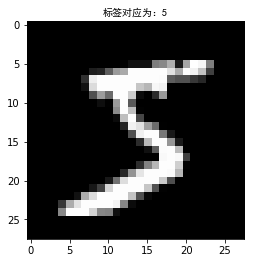

In [3]:
import numpy as np
import struct
import matplotlib.pyplot as plt


def readfile():
    with open(r'F:\data\mnist\train-images.idx3-ubyte','rb') as f1:
        buf1 = f1.read()
    with open(r'F:\data\mnist\train-labels.idx1-ubyte','rb') as f2:
        buf2 = f2.read()
    return buf1, buf2


def get_image(buf1):
    image_index = 0
    image_index += struct.calcsize('>IIII')
    im = []
    for _ in range(60000):
        temp = struct.unpack_from('>784B', buf1, image_index) # '>784B'的意思就是用大端法读取784个unsigned byte
        im.append(np.reshape(temp,(28, 28)))
        image_index += struct.calcsize('>784B')  # 每次增加784B
    return im


def get_label(buf2): # 得到标签数据
    label_index = 0
    label_index += struct.calcsize('>II')
    return struct.unpack_from('>60000B', buf2, label_index)

image_data, label_data = readfile()
im = get_image(image_data)
label = get_label(label_data)

plt.subplot(1, 1, 1)
title = u"标签对应为："+ str(label[0])
plt.title(title, fontproperties='SimHei')
plt.imshow(im[0], cmap='gray')
plt.show()

In [4]:
def readTestFile():
    with open(r'F:\data\mnist\t10k-images.idx3-ubyte','rb') as f1:
        buf1 = f1.read()
    with open(r'F:\data\mnist\t10k-labels.idx1-ubyte','rb') as f2:
        buf2 = f2.read()
    return buf1, buf2

def get_image_test(buf1):
    image_index = 0
    image_index += struct.calcsize('>IIII')
    im = []
    for _ in range(10000):
        temp = struct.unpack_from('>784B', buf1, image_index) # '>784B'的意思就是用大端法读取784个unsigned byte
        im.append(np.reshape(temp,(28,28)))
        image_index += struct.calcsize('>784B')  # 每次增加784B
    return im

def get_label_test(buf2): # 得到标签数据
    label_index = 0
    label_index += struct.calcsize('>II')
    return struct.unpack_from('>10000B', buf2, label_index)

data_test, label_test = readTestFile()
im_test = get_image_test(image_data)
label_test = get_label_test(label_data)

In [11]:
import numpy as np

x = np.array(im).reshape(60000,1,28,28)
y = np.array(label).reshape((60000,1))
x.shape

x_test = np.array(im_test).reshape((10000,28,28))
y_test = np.array(label_test).reshape((10000,1))
x_test.shape

(10000, 28, 28)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()

# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(6, (3, 3), activation='relu', input_shape=(1,28,28)))
model.add(Conv2D(6, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(6, (3, 3), activation='relu'))
model.add(Conv2D(6, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x, y, batch_size=128, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_16/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,6].